In [177]:
using Distributions
using Gadfly

In [233]:
T = 500
λ0 = 0.01
λ1 = 0.2^2
ϕ0 = 1.
ϕ1 = 0.99
Θ  = 0.5

d0   = Laplace(0, λ0)
d1ST = Normal(ϕ0, sqrt(λ1/(1-ϕ1^2)))

β = rand(MixtureModel([d1ST, d0], [Θ, 1-Θ]))

β_all = zeros(T)
θ_all = zeros(T)
γ_all = zeros(T)

for t=1:T
    θ = Θ*pdf(d1ST, β)/(Θ*pdf(d1ST, β) + (1-Θ)*pdf(d0, β))
    γ = rand(Bernoulli(θ))
    μ = ϕ0 + ϕ1*(β-ϕ0)
    d1 = Normal(μ, sqrt(λ1))
    β = rand(MixtureModel([d1, d0], [θ, 1-θ]))
    θ_all[t] = θ
    γ_all[t] = γ
    β_all[t] = β
end


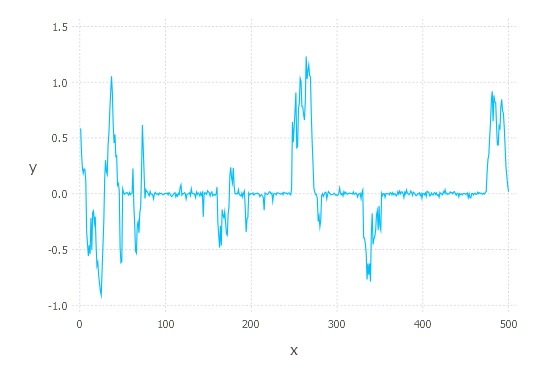

In [234]:
plot(
    layer(x=1:T, y=β_all, Geom.line),
    #layer(x=1:T, y=θ_all, Geom.line, Theme(default_color="orange"))
    )

In [179]:
λ1/(1-ϕ1^2)

2.010050251256279

In [82]:
var(β_all)

0.2242966638305772